<a href="https://colab.research.google.com/github/gauravkinhikar97/Capstone-project-Hotel-Bookings-Analysis-By-Gaurav-Kinhikar-and-Amalkrishna-N/blob/main/RETAIL_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes

from pandas import datetime as dt
from pandas import Series,DataFrame

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [2]:
import matplotlib.pyplot as plt  
%matplotlib inline    
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn import metrics

In [4]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
Data_df = pd.read_csv ("/content/drive/MyDrive/Copy of Rossmann Stores Data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
Data_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [8]:
Data_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


# No null values 

In [ ]:
Data_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [7]:
store_df = pd.read_csv ("/content/drive/MyDrive/Copy of store.csv")

In [8]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
store_df.shape

(1115, 10)

In [8]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [9]:
store_df ['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(),inplace = True)
store_df ['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0],inplace = True)
store_df ['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0],inplace = True)
store_df ['Promo2SinceWeek'].fillna(0, inplace =True)
store_df ['Promo2SinceYear'].fillna(0, inplace =True)
store_df ['PromoInterval'].fillna(0, inplace =True)

# Now there is no null values

In [ ]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,9.0,2013.0,0,0.0,0.0,0
1113,1114,a,c,870.0,9.0,2013.0,0,0.0,0.0,0


In [ ]:
Data_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,3,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,3,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,3,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,3,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1


In [10]:
Data_df['Date'] =pd.to_datetime(Data_df['Date'])
Data_df['Year'] =Data_df['Date'].dt.year
Data_df['Month'] =Data_df['Date'].dt.month
Data_df['Day'] = Data_df['Date'].dt.day
Data_df['Week'] = Data_df['Date'].dt.week%4
Data_df['WeekOfYear'] = Data_df['Date'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month          1017209 non-null  int64         
 11  Day            1017209 non-null  int64         
 12  Week           1017209 non-null  int64         
 13  WeekOfYear     1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(12), o

In [11]:
Data_df1 =Data_df.merge(store_df, how='outer' , on =['Store'])

In [ ]:
Data_df1.columns.value_counts()

Store                        1
Week                         1
Promo2SinceYear              1
Promo2SinceWeek              1
Promo2                       1
CompetitionOpenSinceYear     1
CompetitionOpenSinceMonth    1
CompetitionDistance          1
Assortment                   1
StoreType                    1
WeekOfYear                   1
Day                          1
DayOfWeek                    1
Month                        1
Year                         1
SchoolHoliday                1
StateHoliday                 1
Promo                        1
Open                         1
Customers                    1
Sales                        1
Date                         1
PromoInterval                1
dtype: int64

In [11]:
Data_df1.columns.value_counts().sum()

23

In [ ]:
Data_df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'Week',
       'WeekOfYear', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
Data_df1['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [ ]:
Data_df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [ ]:
#describe fun only gives statistical data about numerical features

Data_df1.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,1.509300e+00,2.361551e+01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.113273e+00,1.443338e+01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.000000e+00,1.100000e+01,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.000000e+00,2.200000e+01,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,3.000000e+00,3.500000e+01,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,3.000000e+00,5.200000e+01,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


# Numerical features 

In [ ]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


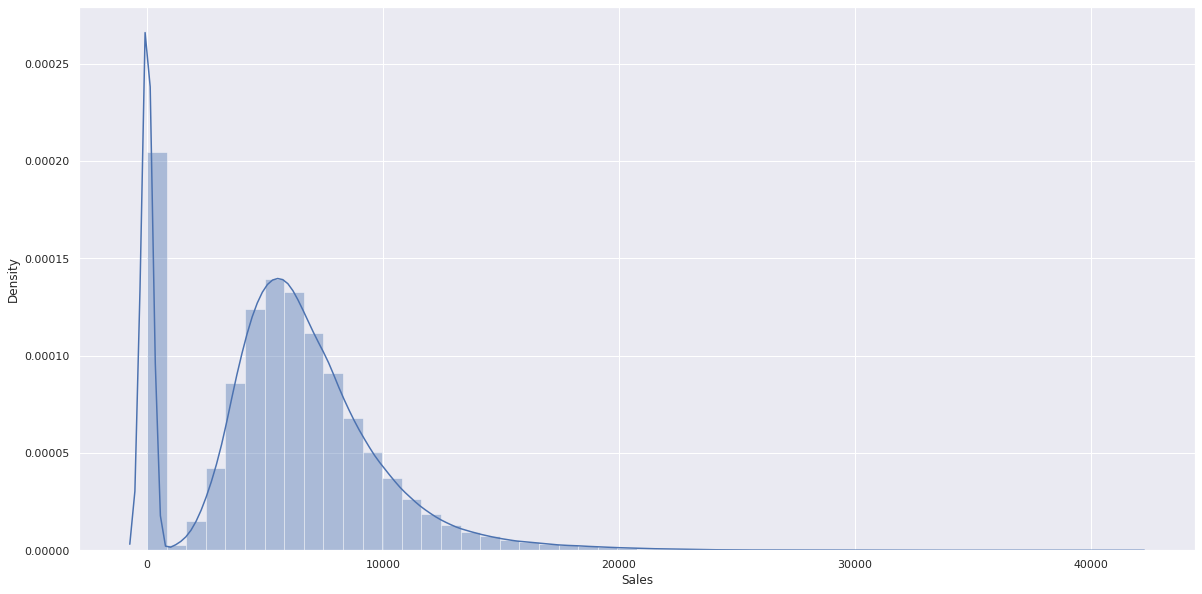

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(Data_df1["Sales"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


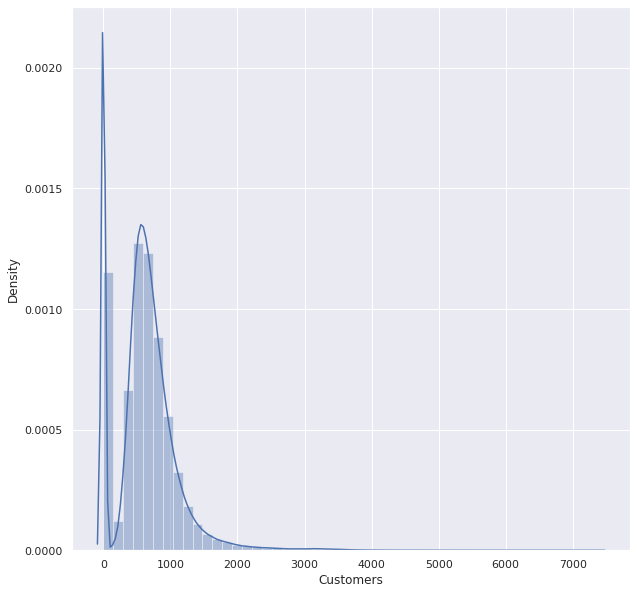

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(Data_df1["Customers"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


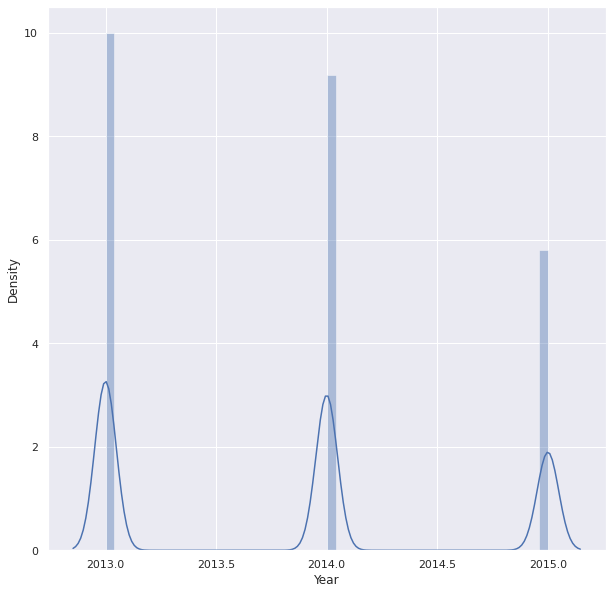

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(Data_df1["Year"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


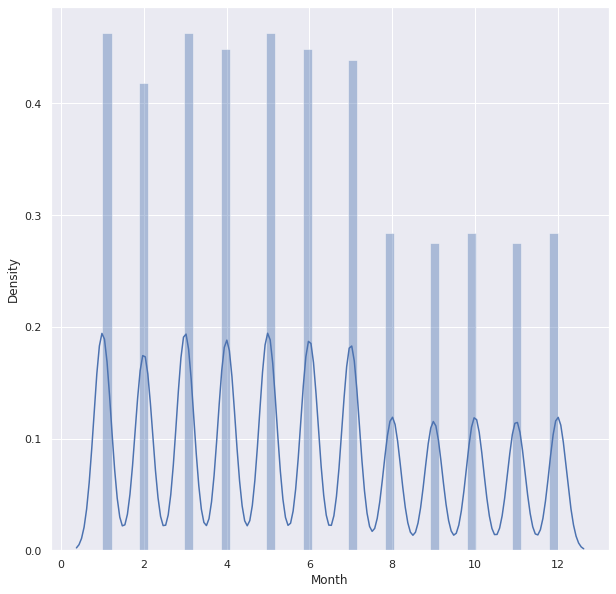

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(Data_df1["Month"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


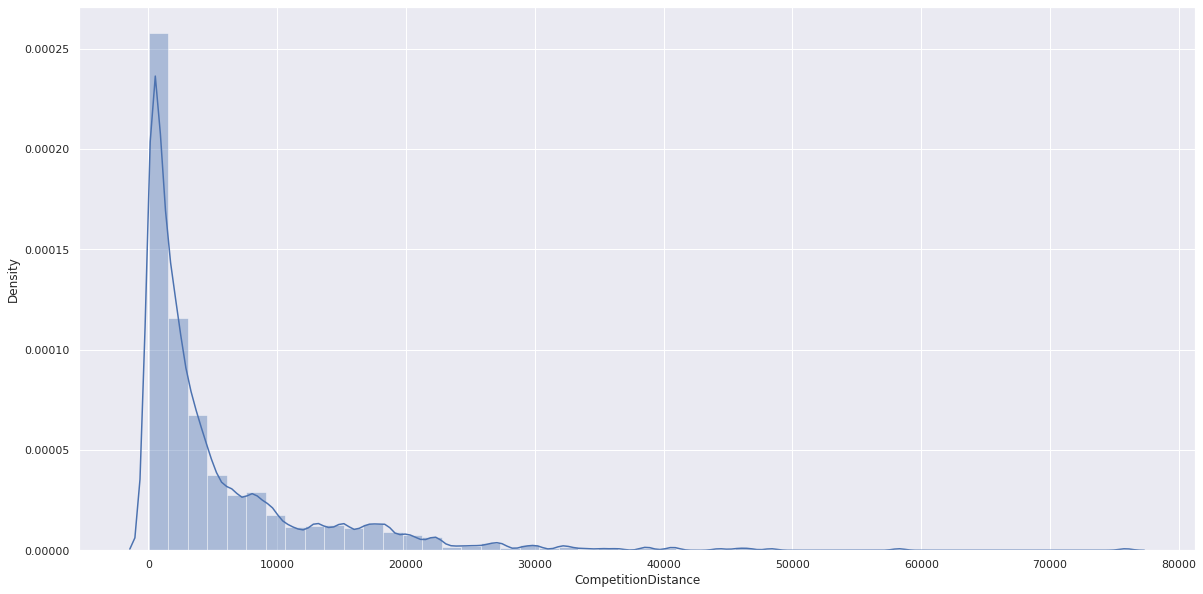

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(Data_df1["CompetitionDistance"])
plt.show()

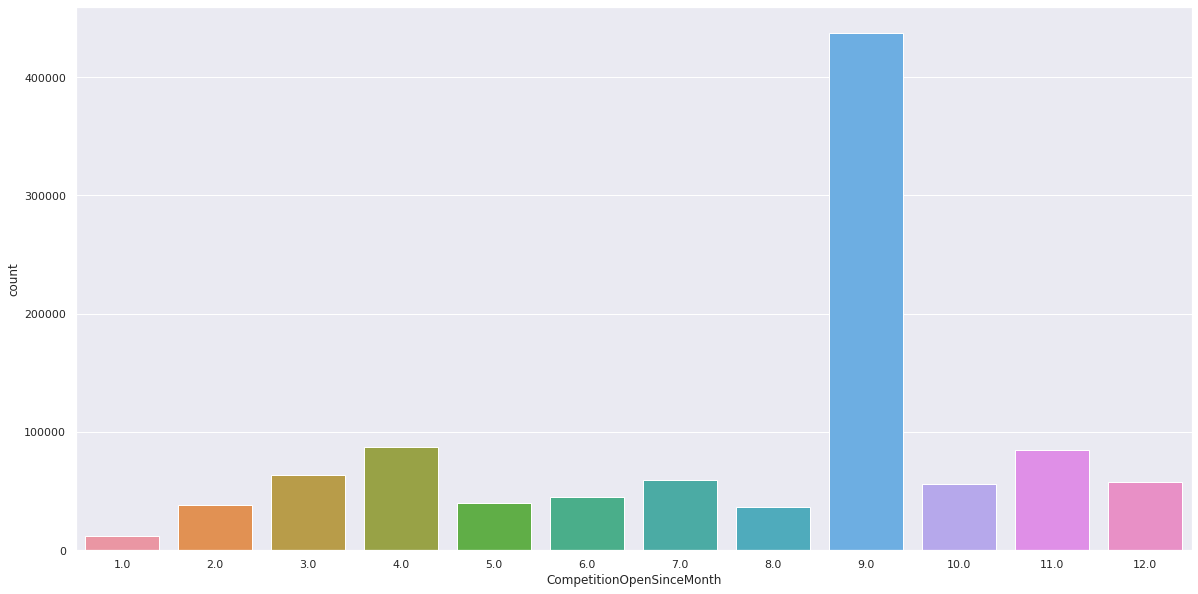

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='CompetitionOpenSinceMonth',data =Data_df1)
plt.show()

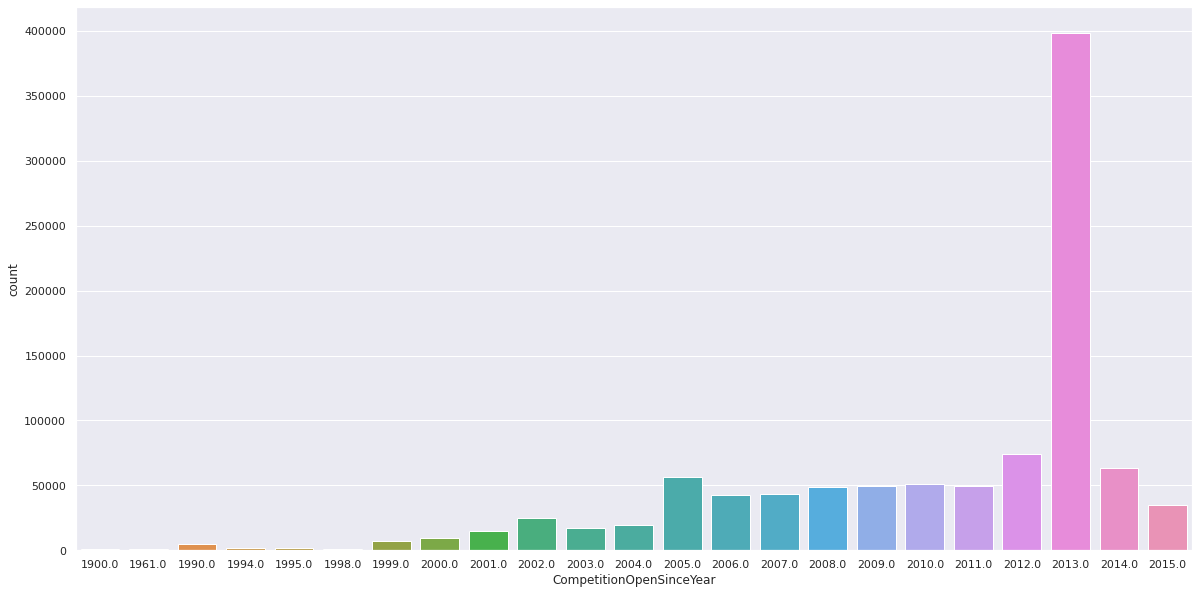

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='CompetitionOpenSinceYear',data =Data_df1)
plt.show()

# Categorical Features 

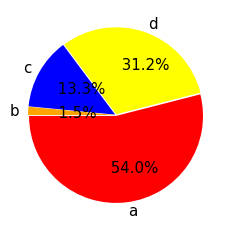

In [ ]:
labels = store_df1['StoreType'].value_counts().index.tolist()
size = store_df1['StoreType'].value_counts().tolist()
explode = (0.01,0.01,0.01,0.01)
colors = ['red', 'yellow','blue','orange']

plt.pie(size, explode=explode, labels=labels, colors=colors, autopct='%9.1f%%',startangle =180, textprops={'fontsize':15})
plt.show()

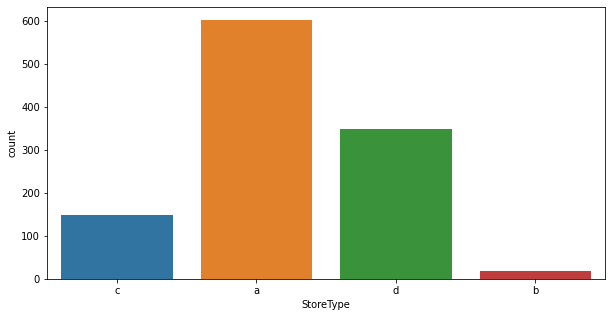

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='StoreType',data = store_df)

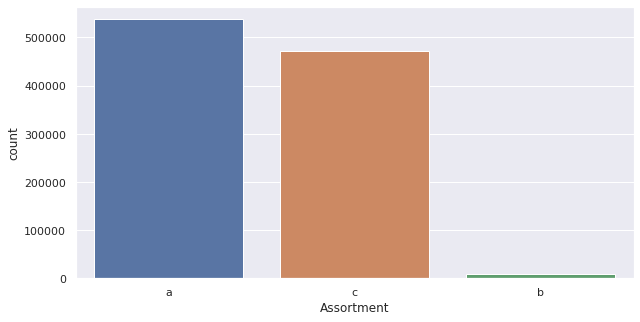

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Assortment',data = Data_df1)

In [ ]:
PromoInterval

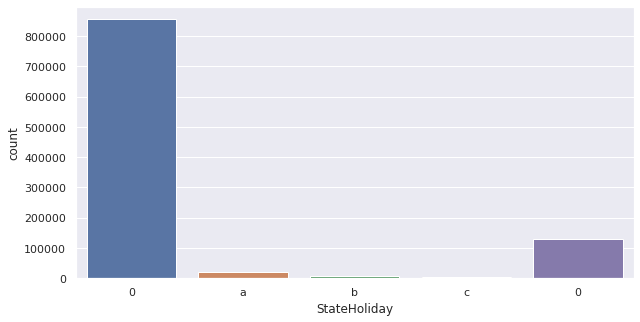

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='StateHoliday',data = Data_df1)

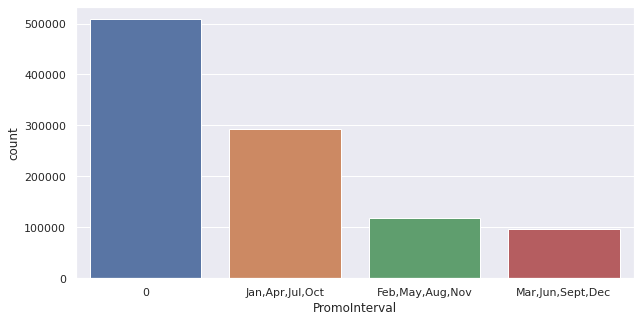

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='PromoInterval',data = Data_df1)

In [14]:
Data_df1.apply(lambda x : len (x.unique()))

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
Year                             3
Month                           12
Day                             31
Week                             4
WeekOfYear                      52
StoreType                        4
Assortment                       3
CompetitionDistance            655
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 25
Promo2SinceYear                  8
PromoInterval                    4
dtype: int64

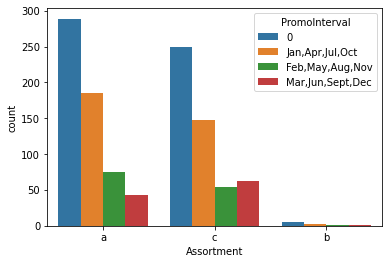

In [ ]:
sns.countplot(x=store_df['Assortment'],hue=store_df['PromoInterval'])
plt.rcParams['figure.figsize'] = (18, 5)

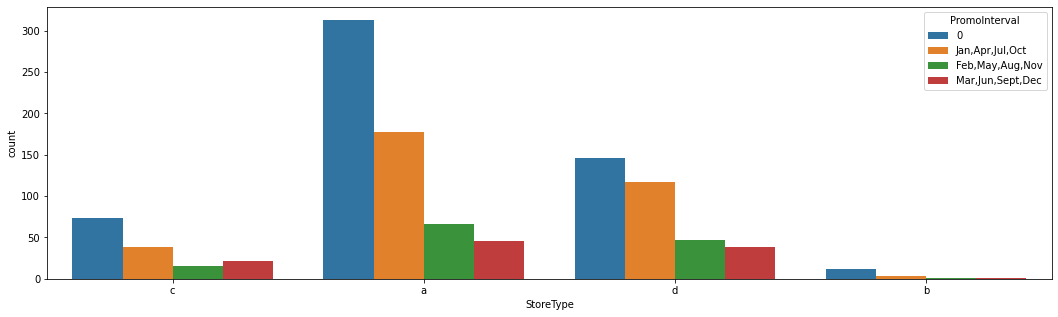

In [ ]:
 sns.countplot(x=store_df['StoreType'],hue=store_df['PromoInterval'])
plt.rcParams['figure.figsize'] = (18, 5)

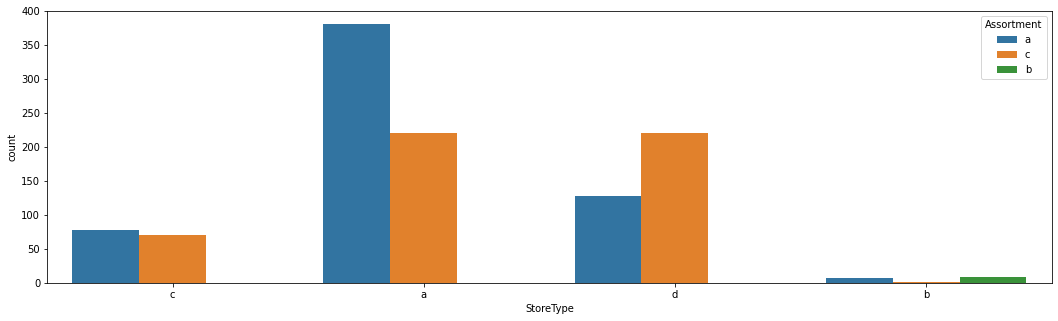

In [ ]:
sns.countplot(x=store_df['StoreType'],hue=store_df['Assortment'])
plt.rcParams['figure.figsize'] = (18, 5)

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
sns.distplot(store_df['Promo2SinceYear'], bins=25)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


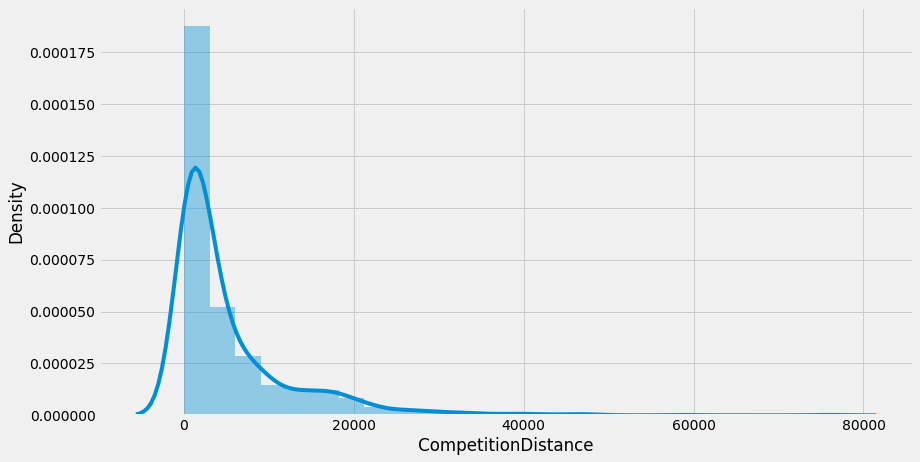

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
sns.distplot(store_df['CompetitionDistance'], bins=25)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


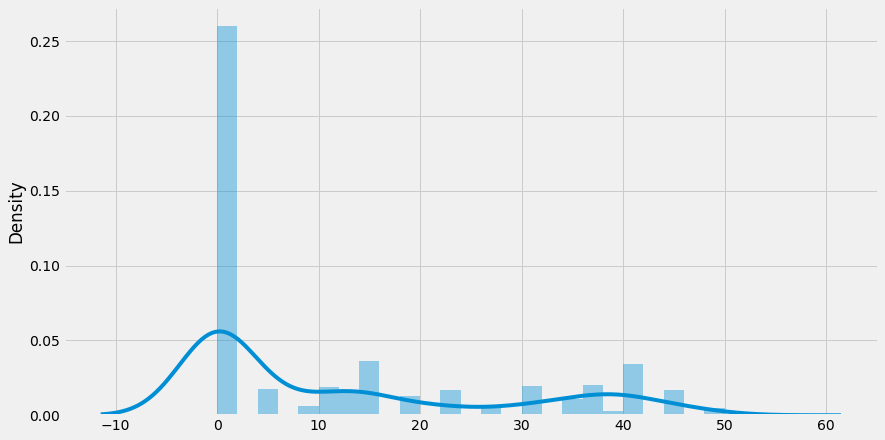

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
sns.distplot(x=store_df['Promo2SinceWeek'], bins=25)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


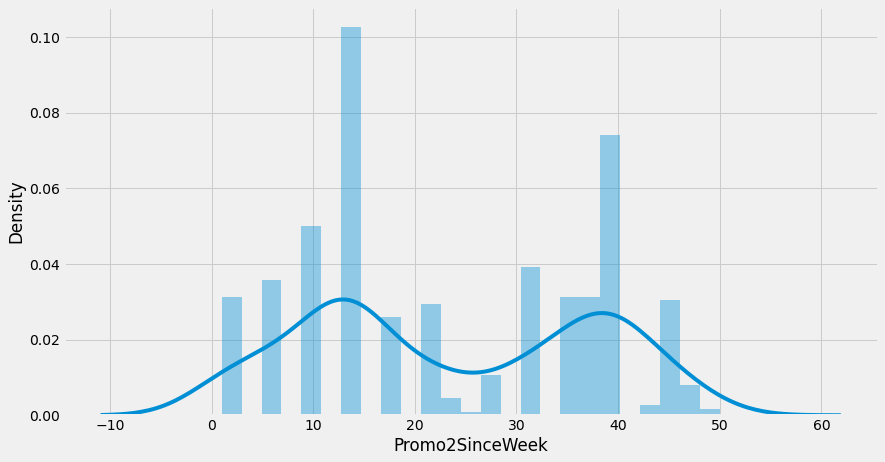

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
sns.distplot(store_df['Promo2SinceWeek'], bins=25)

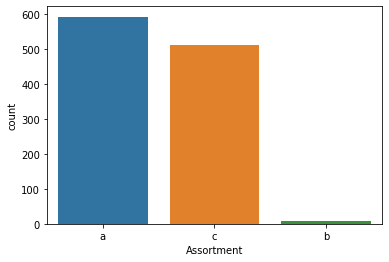

In [ ]:
sns.countplot('Assortment',data = store_df)

In [ ]:
store_df.value_counts('Store')

Store
1       1
742     1
748     1
747     1
746     1
       ..
378     1
379     1
380     1
381     1
1115    1
Length: 1115, dtype: int64

In [ ]:
Data_df.value_counts('Sales')

Sales
0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
20349         1
20351         1
20357         1
20358         1
41551         1
Length: 21734, dtype: int64

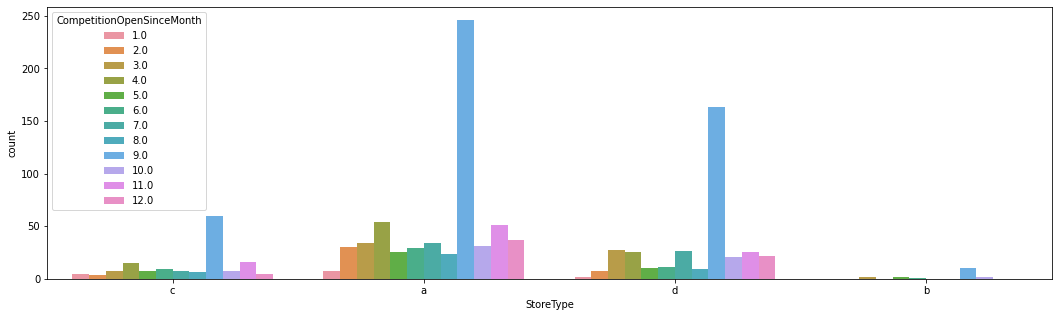

In [ ]:
sns.countplot(x=store_df['StoreType'],hue=store_df['CompetitionOpenSinceMonth'])
plt.rcParams['figure.figsize'] = (18, 5)

In [ ]:
store_df.value_counts('CompetitionOpenSinceYear')

CompetitionOpenSinceYear
2013.0    437
2012.0     82
2014.0     70
2005.0     62
2010.0     55
2011.0     54
2009.0     54
2008.0     54
2007.0     48
2006.0     47
2015.0     38
2002.0     27
2004.0     22
2003.0     19
2001.0     16
2000.0     10
1999.0      8
1990.0      5
1995.0      2
1994.0      2
1961.0      1
1998.0      1
1900.0      1
dtype: int64

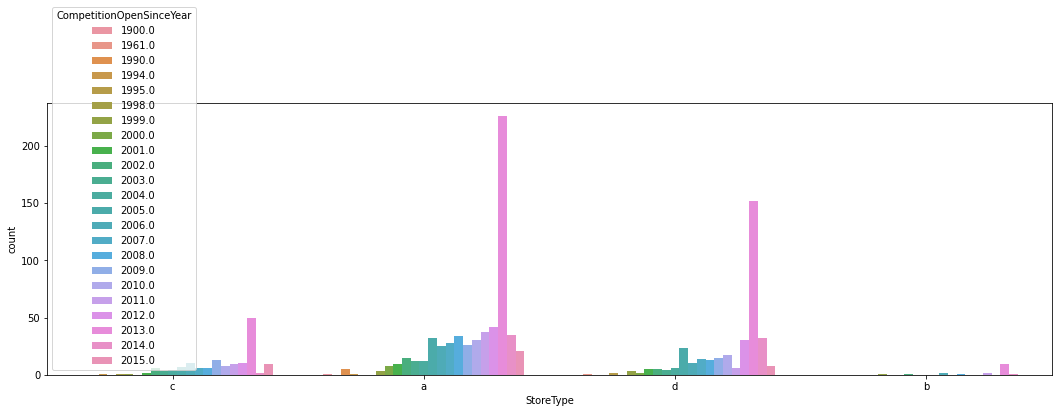

In [ ]:
sns.countplot(x=store_df['StoreType'],hue=store_df['CompetitionOpenSinceYear'])
plt.rcParams['figure.figsize'] = (18, 5)

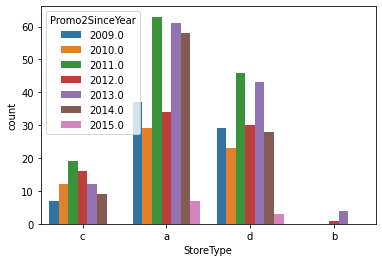

In [ ]:
sns.countplot(x=store_df['StoreType'],hue=store_df['Promo2SinceYear'])
plt.rcParams['figure.figsize'] = (18, 5)

In [ ]:
sns.countplot(x=store_df['StoreType'],hue=store_df['Promo2SincMonth'])
plt.rcParams['figure.figsize'] = (18, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


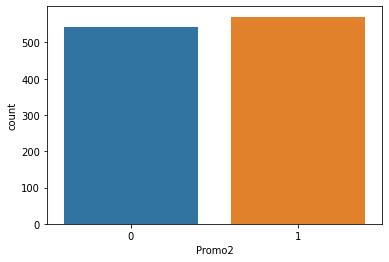

In [ ]:
sns.countplot(store_df['Promo2'])

In [ ]:
Data_df1.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,1.509300e+00,2.361551e+01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.113273e+00,1.443338e+01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.000000e+00,1.100000e+01,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.000000e+00,2.200000e+01,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,3.000000e+00,3.500000e+01,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,3.000000e+00,5.200000e+01,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [ ]:
Data_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Year                       1017209 non-null  int64         
 10  Month                      1017209 non-null  int64         
 11  Day                        1017209 no

In [12]:
Data_df1.drop(['Date'], axis = 1, inplace = True)

In [16]:
Data_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   Year                       1017209 non-null  int64  
 9   Month                      1017209 non-null  int64  
 10  Day                        1017209 non-null  int64  
 11  Week                       1017209 non-null  int64  
 12  WeekOfYear                 1017209 non-null  int64  
 13  StoreType   

Categorical Features 


1.   StateHoliday
2.   StoreType
3.   Assortment  
4.   PromoInterval                                  



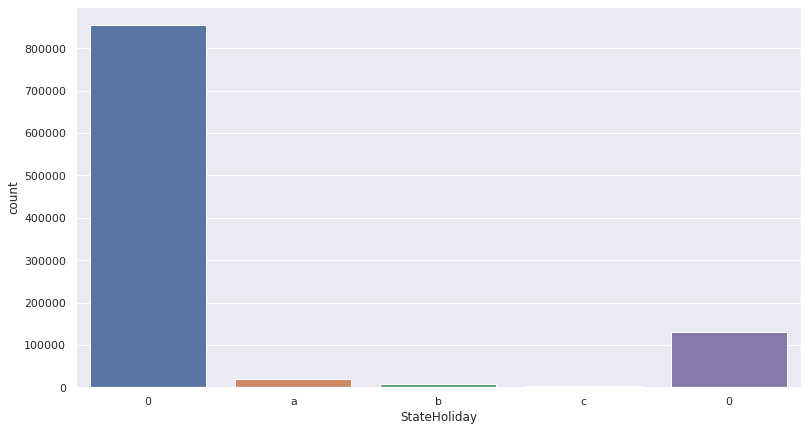

In [ ]:
plt.figure(figsize=(13,7))
sns.countplot(x='StateHoliday' , data = Data_df1)
plt.show()

In [13]:
Data_df1['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [14]:
Data_df1['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [15]:
Data_df1['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [16]:
Data_df1['PromoInterval'].unique()

array([0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [ ]:
Data_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   Year                       1017209 non-null  int64  
 9   Month                      1017209 non-null  int64  
 10  Day                        1017209 non-null  int64  
 11  Week                       1017209 non-null  int64  
 12  WeekOfYear                 1017209 non-null  int64  
 13  StoreType   

In [17]:
final_Data = pd.get_dummies(Data_df1,drop_first = True)

In [18]:
final_Data

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,...,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,1,2015,7,31,...,0,0,0,1,0,0,0,0,0,0
1,1,4,5020,546,1,1,1,2015,7,30,...,0,0,0,1,0,0,0,0,0,0
2,1,3,4782,523,1,1,1,2015,7,29,...,0,0,0,1,0,0,0,0,0,0
3,1,2,5011,560,1,1,1,2015,7,28,...,0,0,0,1,0,0,0,0,0,0
4,1,1,6102,612,1,1,1,2015,7,27,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,1,2013,1,5,...,0,0,0,0,1,0,1,0,0,1
1017205,1115,5,4540,326,1,0,1,2013,1,4,...,0,0,0,0,1,0,1,0,0,1
1017206,1115,4,4297,300,1,0,1,2013,1,3,...,0,0,0,0,1,0,1,0,0,1
1017207,1115,3,3697,305,1,0,1,2013,1,2,...,0,0,0,0,1,0,1,0,0,1


In [ ]:
pd.get_dummies(Data_df1,drop_first = True)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,...,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,1,2015,7,31,...,0,0,0,1,0,0,0,0,0,0
1,1,4,5020,546,1,1,1,2015,7,30,...,0,0,0,1,0,0,0,0,0,0
2,1,3,4782,523,1,1,1,2015,7,29,...,0,0,0,1,0,0,0,0,0,0
3,1,2,5011,560,1,1,1,2015,7,28,...,0,0,0,1,0,0,0,0,0,0
4,1,1,6102,612,1,1,1,2015,7,27,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,1,2013,1,5,...,0,0,0,0,1,0,1,0,0,1
1017205,1115,5,4540,326,1,0,1,2013,1,4,...,0,0,0,0,1,0,1,0,0,1
1017206,1115,4,4297,300,1,0,1,2013,1,3,...,0,0,0,0,1,0,1,0,0,1
1017207,1115,3,3697,305,1,0,1,2013,1,2,...,0,0,0,0,1,0,1,0,0,1


In [ ]:
Data_df1

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020,546,1,1,0,1,2015,7,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782,523,1,1,0,1,2015,7,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011,560,1,1,0,1,2015,7,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102,612,1,1,0,1,2015,7,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,4540,326,1,0,0,1,2013,1,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,4297,300,1,0,0,1,2013,1,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,3697,305,1,0,0,1,2013,1,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [22]:
final_Data

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,...,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,1,2015,7,31,...,0,0,0,1,0,0,0,0,0,0
1,1,4,5020,546,1,1,1,2015,7,30,...,0,0,0,1,0,0,0,0,0,0
2,1,3,4782,523,1,1,1,2015,7,29,...,0,0,0,1,0,0,0,0,0,0
3,1,2,5011,560,1,1,1,2015,7,28,...,0,0,0,1,0,0,0,0,0,0
4,1,1,6102,612,1,1,1,2015,7,27,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,1,2013,1,5,...,0,0,0,0,1,0,1,0,0,1
1017205,1115,5,4540,326,1,0,1,2013,1,4,...,0,0,0,0,1,0,1,0,0,1
1017206,1115,4,4297,300,1,0,1,2013,1,3,...,0,0,0,0,1,0,1,0,0,1
1017207,1115,3,3697,305,1,0,1,2013,1,2,...,0,0,0,0,1,0,1,0,0,1


In [23]:
final_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 30 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Store                           1017209 non-null  int64  
 1   DayOfWeek                       1017209 non-null  int64  
 2   Sales                           1017209 non-null  int64  
 3   Customers                       1017209 non-null  int64  
 4   Open                            1017209 non-null  int64  
 5   Promo                           1017209 non-null  int64  
 6   SchoolHoliday                   1017209 non-null  int64  
 7   Year                            1017209 non-null  int64  
 8   Month                           1017209 non-null  int64  
 9   Day                             1017209 non-null  int64  
 10  Week                            1017209 non-null  int64  
 11  WeekOfYear                      1017209 non-null  int64  
 12  

In [35]:
final_Data.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,...,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
Store,1.000000,-8.483588e-06,0.005126,0.024325,-0.000047,5.786226e-05,0.000641,0.000290,0.001467,2.259853e-05,...,-1.086178e-04,1.443168e-04,0.001412,0.060986,-0.051492,0.019328,0.002661,8.035330e-03,0.012181,-0.013087
DayOfWeek,-0.000008,1.000000e+00,-0.462125,-0.386445,-0.528963,-3.929253e-01,-0.205388,0.001937,-0.005362,5.136457e-03,...,-4.066836e-02,-1.345413e-03,-0.000019,-0.000039,0.000071,-0.000007,-0.000051,-3.017220e-07,0.000198,-0.000019
Sales,0.005126,-4.621250e-01,1.000000,0.894711,0.678472,4.523447e-01,0.085124,0.023519,0.048768,-1.161188e-02,...,-1.174965e-01,-9.261768e-02,0.139940,-0.005140,-0.022854,0.065473,0.068772,-4.366787e-02,-0.034946,-0.053267
Customers,0.024325,-3.864447e-01,0.894711,1.000000,0.616768,3.161695e-01,0.071568,-0.001212,0.038179,-4.473140e-03,...,-1.045224e-01,-8.300669e-02,0.366726,0.034059,-0.189039,0.275905,-0.017859,-6.547287e-02,-0.078401,-0.063053
Open,-0.000047,-5.289625e-01,0.678472,0.616768,1.000000,2.950423e-01,0.086171,-0.001009,-0.000681,3.342796e-02,...,-1.751578e-01,-1.376851e-01,0.051233,-0.004709,-0.005538,0.038631,-0.000522,-3.608057e-03,-0.005269,-0.002074
Promo,0.000058,-3.929253e-01,0.452345,0.316169,0.295042,1.000000e+00,0.067483,0.024300,-0.011747,-1.083245e-01,...,1.984658e-02,-4.996370e-02,0.000108,0.000223,-0.000414,0.000039,0.000290,-6.029887e-07,-0.001154,0.000107
SchoolHoliday,0.000641,-2.053883e-01,0.085124,0.071568,0.086171,6.748281e-02,1.000000,-0.036535,0.103282,3.053818e-02,...,1.590977e-01,1.364053e-01,0.001825,0.001557,-0.000899,0.000608,-0.002576,-2.109399e-03,-0.004427,-0.002624
Year,0.000290,1.937284e-03,0.023519,-0.001212,-0.001009,2.429961e-02,-0.036535,1.000000,-0.269382,-2.484850e-03,...,1.755304e-02,-3.078465e-02,0.000550,0.001131,-0.002099,0.000196,0.001471,-2.018147e-06,-0.005853,0.000545
Month,0.001467,-5.361725e-03,0.048768,0.038179,-0.000681,-1.174726e-02,0.103282,-0.269382,1.000000,1.244160e-02,...,-4.925411e-02,1.176882e-01,0.002796,0.005751,-0.010670,0.000999,0.007484,-8.836339e-06,-0.029751,0.002771
Day,0.000023,5.136457e-03,-0.011612,-0.004473,0.033428,-1.083245e-01,0.030538,-0.002485,0.012442,1.000000e+00,...,-2.502541e-02,7.092418e-02,0.000039,0.000079,-0.000150,0.000014,0.000103,-7.133183e-07,-0.000415,0.000038


In [ ]:
sns.pairplot(Data_df1)


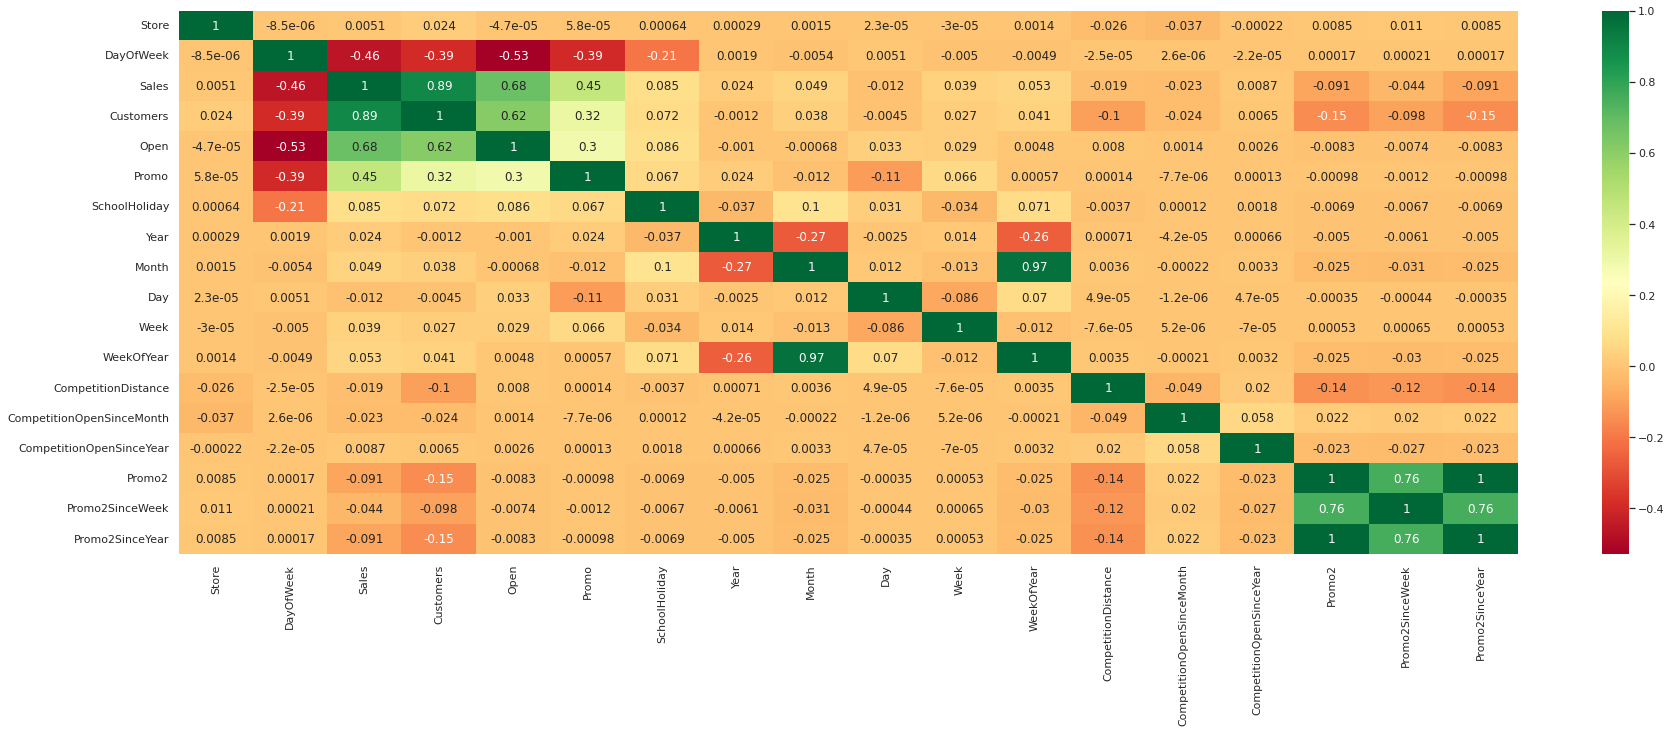

In [36]:
heatmaps = Data_df1.corr()
top_corr_features = heatmaps.index
plt.figure(figsize=(30,10))
g=sns.heatmap(final_Data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [ ]:
Data

# linear regression

In [19]:
X = final_Data.drop(columns='Sales',axis=1)
Y = final_Data['Sales']

In [20]:
X_train , X_test ,Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state =2)

In [20]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [21]:
Y_pred=reg.predict(X_test)

In [22]:
from sklearn.metrics import r2_score 

In [23]:
r2_score(Y_pred,Y_test)

0.8885438741757132

# XGBooster

In [23]:
X = final_Data.drop(columns='Sales',axis=1)
Y = final_Data['Sales']

In [ ]:
print(X)

In [ ]:
print(Y)

In [26]:
X_train , X_test ,Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state =2)

In [27]:
print(X.shape, X_train.shape ,X_test.shape)

(1017209, 29) (813767, 29) (203442, 29)


In [28]:
regressor = XGBRegressor()

In [29]:
regressor.fit(X_train , Y_train)

[08:42:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [30]:
prediction_training_data = regressor.predict(X_train)

In [31]:
r2_train = metrics.r2_score(Y_train,prediction_training_data)

In [32]:
print('R Squared Value = ',r2_train)

R Squared Value =  0.9397925488585948


In [33]:
prediction_testing_data = regressor.predict(X_test)

In [34]:
r2_test = metrics.r2_score(Y_test,prediction_testing_data)

In [35]:
print('R Squared Value = ',r2_test)

R Squared Value =  0.9378010005337443


# Decision tree

In [21]:
from sklearn.model_selection import cross_val_score

In [23]:
des_reg = DecisionTreeRegressor(random_state= 10)
cross_val_score(des_reg,X_train,Y_train,cv = 10).mean()

0.9726752572263629

In [24]:
X = final_Data.drop(columns='Sales',axis=1)
Y = final_Data['Sales']

In [25]:
X_train , X_test ,Y_train , Y_test = train_test_split(X,Y,test_size=0.33,random_state =324)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
treemodel = DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)

In [28]:

treemodel.fit(X_train,Y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

[Text(0.5, 0.9166666666666666, 'X[2] <= 9.0\ngini = 0.971\nsamples = 681530\nvalue = [115663, 1, 1 ... 1, 1, 1]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 115663\nvalue = [115663, 0, 0 ... 0, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[2] <= 611.5\ngini = 1.0\nsamples = 565867\nvalue = [0, 1, 1 ... 1, 1, 1]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 407.5\ngini = 1.0\nsamples = 226239\nvalue = [0, 1, 1 ... 0, 0, 0]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[2] <= 287.5\ngini = 1.0\nsamples = 56326\nvalue = [0, 1, 1 ... 0, 0, 0]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.999\nsamples = 11274\nvalue = [0, 1, 1 ... 0, 0, 0]'),
 Text(0.23076923076923078, 0.25, 'X[23] <= 0.5\ngini = 1.0\nsamples = 45052\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.15384615384615385, 0.08333333333333333, 'gini = 1.0\nsamples = 23471\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.3076923076923077, 0.08333333333333333, 'gini = 1.0\nsamples = 21581\nvalue = [0, 0, 0 ... 0, 0, 

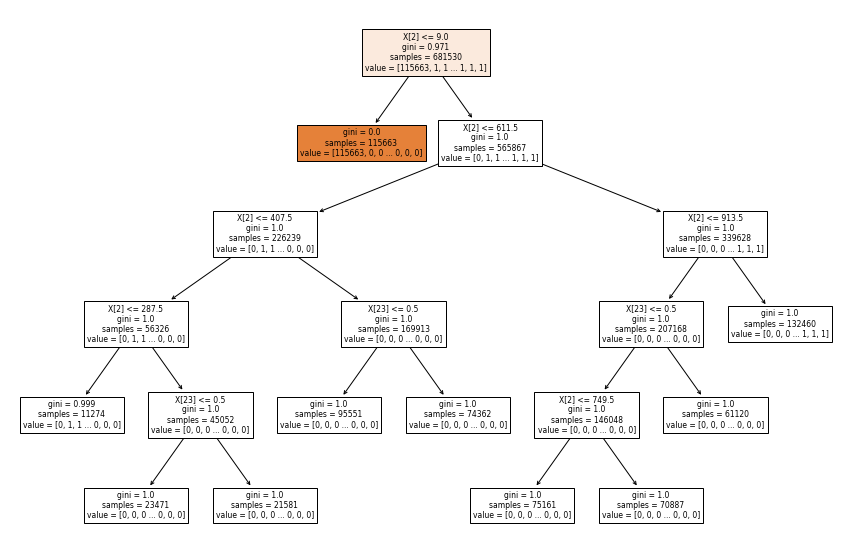

In [29]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled =True)

In [ ]:
Y_predict=treemodel.predict(X_test)

In [ ]:
Y_predict